# Preprocessing

| **Category**                 | **Method / Tool**                    | **Purpose**                                            |
| ---------------------------- | ------------------------------------ | ------------------------------------------------------ |
| **Scaling / Normalization**  | `StandardScaler`                     | Mean = 0, Std = 1                                      |
|                              | `MinMaxScaler`                       | Scale to range \[0, 1]                                 |
|                              | `MaxAbsScaler`                       | Scale by max abs value (good for sparse data)          |
|                              | `RobustScaler`                       | Scale using median and IQR (resistant to outliers)     |
|                              | `Normalizer`                         | Normalize each sample to unit norm (L1 or L2)          |
| **Transformation**           | `PowerTransformer`                   | Make data more Gaussian (Yeo-Johnson, Box-Cox)         |
|                              | `QuantileTransformer`                | Transform to uniform or normal distribution            |
| **Thresholding / Binning**   | `Binarizer`                          | Threshold numerical features to 0/1                    |
|                              | `KBinsDiscretizer`                   | Bin continuous features into discrete intervals        |
| **Feature Expansion**        | `PolynomialFeatures`                 | Add interaction and polynomial terms                   |
| **Encoding (Categorical)**   | `OneHotEncoder`                      | Convert categories to binary columns                   |
|                              | `OrdinalEncoder`                     | Convert categories to ordered numbers                  |
|                              | `LabelEncoder`                       | Encode target labels (for classification)              |
| **Missing Values**           | `SimpleImputer`                      | Fill with mean, median, mode, or constant              |
|                              | `KNNImputer`                         | Impute using K-nearest neighbors                       |
|                              | `IterativeImputer`                   | Model-based imputation (like MICE)                     |
| **Text Processing**          | `CountVectorizer`, `TfidfVectorizer` | Convert text to numerical feature vectors              |
| **Dimensionality Reduction** | `PCA`, `TruncatedSVD`, `UMAP`        | Reduce number of features while preserving variance    |
| **Workflow Integration**     | `Pipeline`                           | Chain preprocessing and modeling steps into one object |
|                              | `ColumnTransformer`                  | Apply different transformations to different columns   |


| Step                                               | Purpose                                             | Tool                          |
| -------------------------------------------------- | --------------------------------------------------- | ----------------------------- |
| **1. View sample rows**                            | Understand what features exist                      | `df.head()`                   |
| **2. Check data types**                            | Know which columns are numeric/categorical          | `df.dtypes`                   |
| **3. Check for missing values**                    | Decide if you need imputation                       | `df.isna().sum()`             |
| **4. Check value ranges**                          | Decide if scaling is needed                         | `df.describe()`               |
| **5. Check class balance** *(if classification)*   | Might need resampling                               | `df['target'].value_counts()` |
| **6. Check for outliers**                          | Decide if `RobustScaler` is better                  | boxplots, histograms          |
| **7. Check feature distributions**                 | Might use `PowerTransformer`, `QuantileTransformer` | `sns.histplot(df[col])`       |
| **8. Check unique values for categorical columns** | Determine if encoding is needed                     | `df['col'].unique()`          |


| If you find...         | You might apply...                        |
| ---------------------- | ----------------------------------------- |
| Missing values         | `SimpleImputer`                           |
| Skewed numeric data    | `PowerTransformer`, `QuantileTransformer` |
| Different units/ranges | `StandardScaler`, `MinMaxScaler`          |
| Outliers               | `RobustScaler`                            |
| Categorical features   | `OneHotEncoder`, `OrdinalEncoder`         |


In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
    PowerTransformer,
    QuantileTransformer,
    Binarizer,
    PolynomialFeatures,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [11]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## 1. Basic Overview

In [12]:
df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
17855,10.9722,5.0,7.978070,1.074561,802.0,3.517544,37.46,-121.88,5.00001
13845,2.3617,6.0,4.726439,1.155129,2447.0,2.040867,34.51,-117.34,1.03100
14449,5.4103,33.0,5.275748,0.960133,683.0,2.269103,32.81,-117.24,3.32400


In [13]:
df.shape

(20640, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
df.isna().sum().sort_values()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 2. Distribution Plots


Feature Distributions:


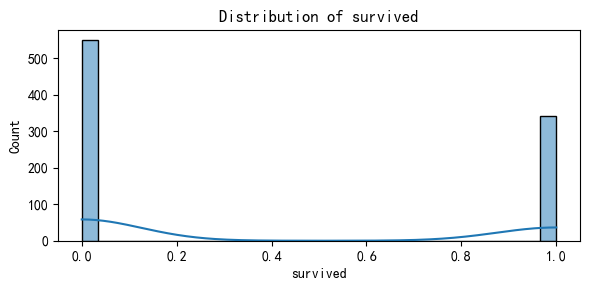

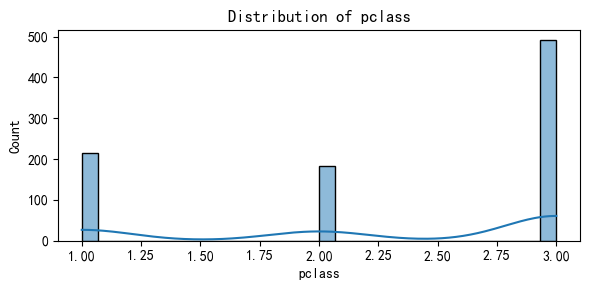

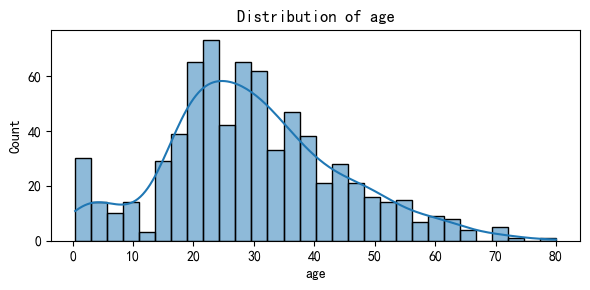

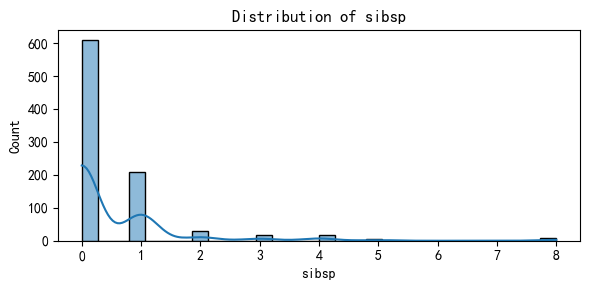

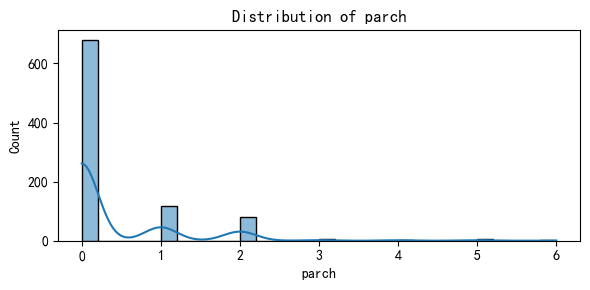

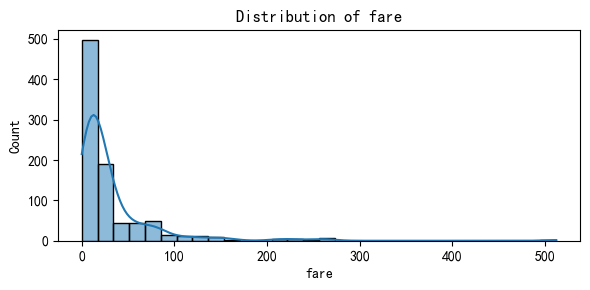

In [58]:
num_cols = df.select_dtypes(include='number').columns

print("\nFeature Distributions:")
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(x=df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


## 3. Correlation Heatmap

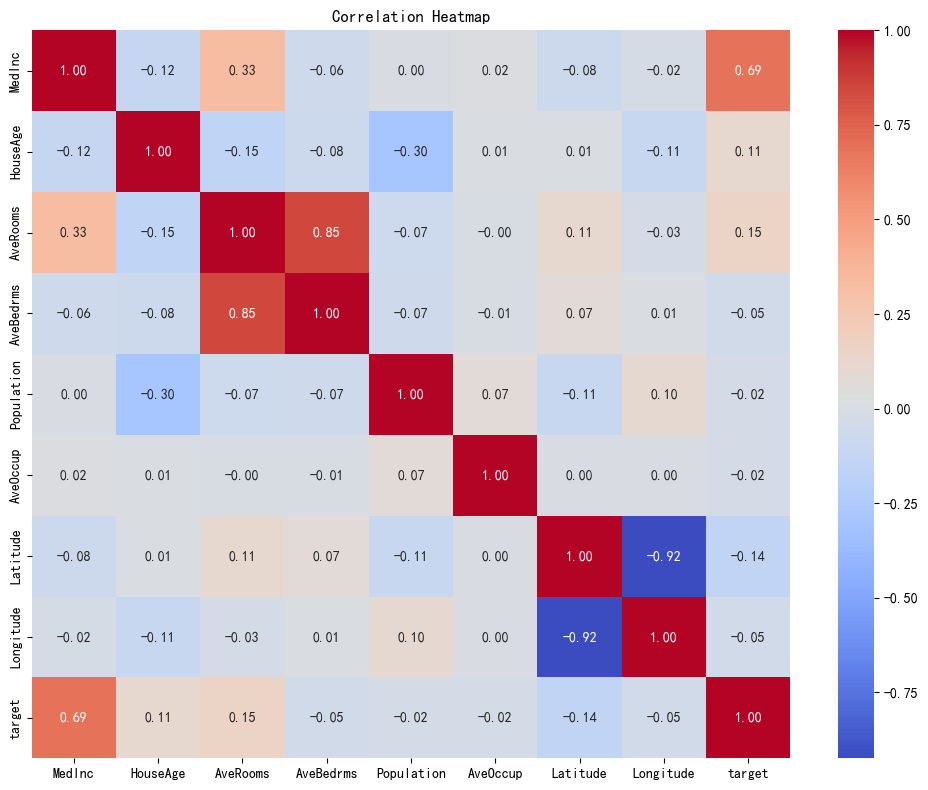

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 4. Outlier Detection

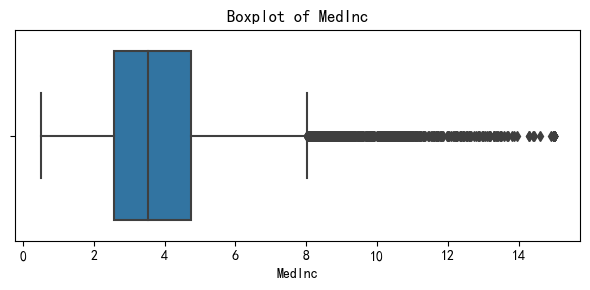

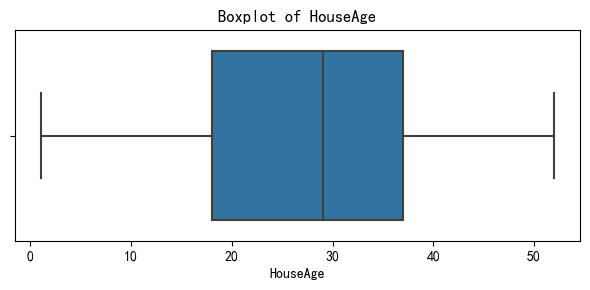

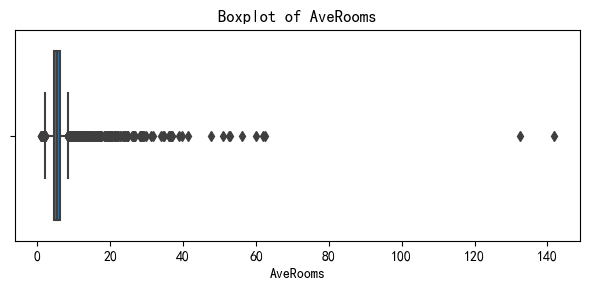

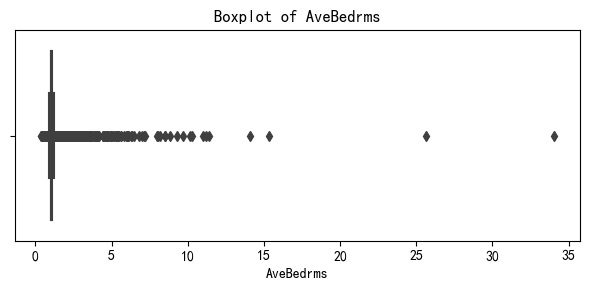

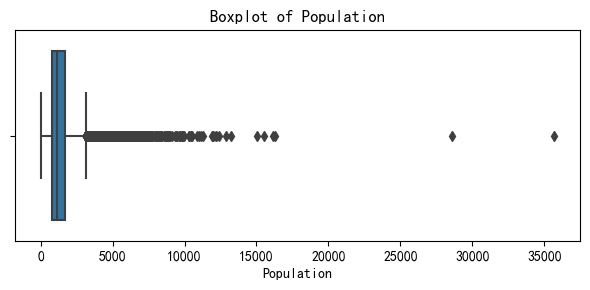

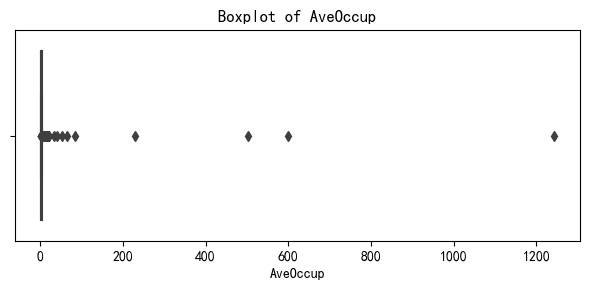

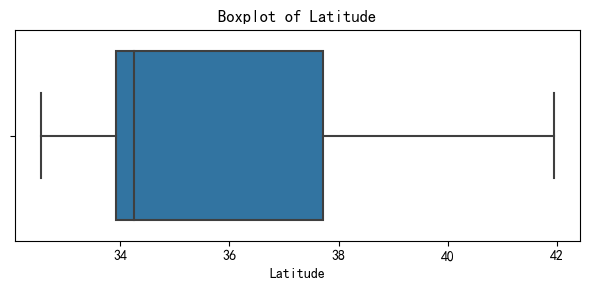

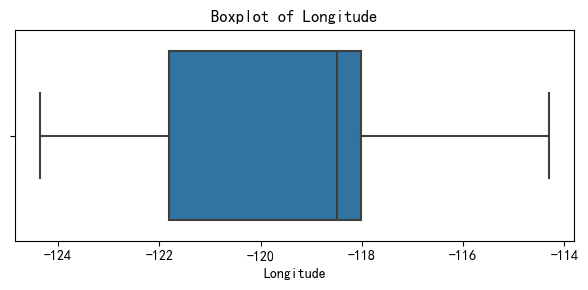

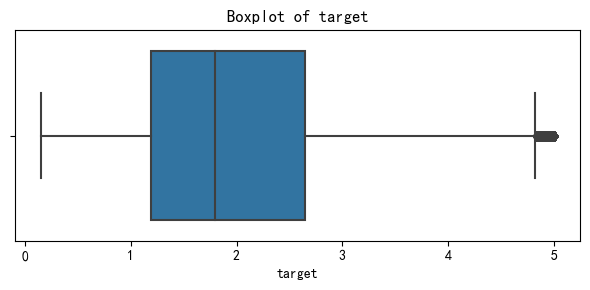

In [22]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

## 5. Unique Values (Categorical)

In [25]:
# Simulate a categorical column
bins = pd.cut(df['MedInc'], bins=[0, 2, 4, 6, 10], labels=['Low', 'Mid', 'High', 'VeryHigh'])
df['IncomeCategory'] = bins
df['IncomeCategory'].value_counts()

Mid         10096
High         5725
Low          2457
VeryHigh     2054
Name: IncomeCategory, dtype: int64

# ---------------------------------

In [26]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]


### Inspect the data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [33]:
df.isna().sum().sort_values()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
embarked      2
age         177
dtype: int64

In [30]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [34]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

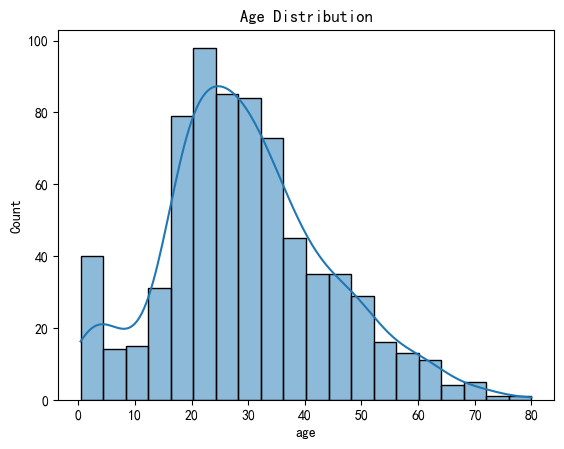

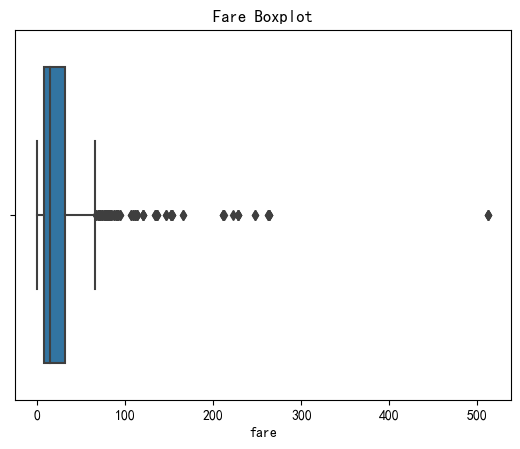

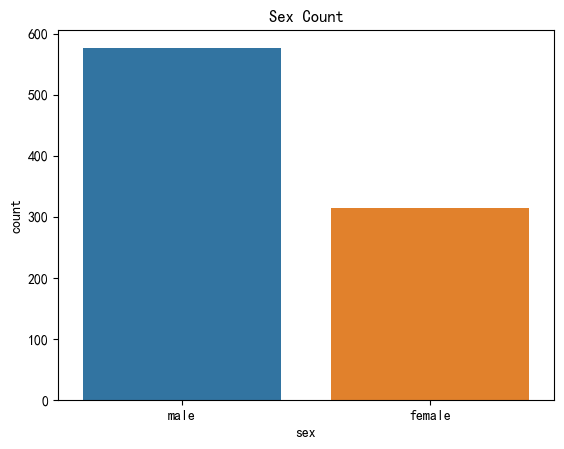

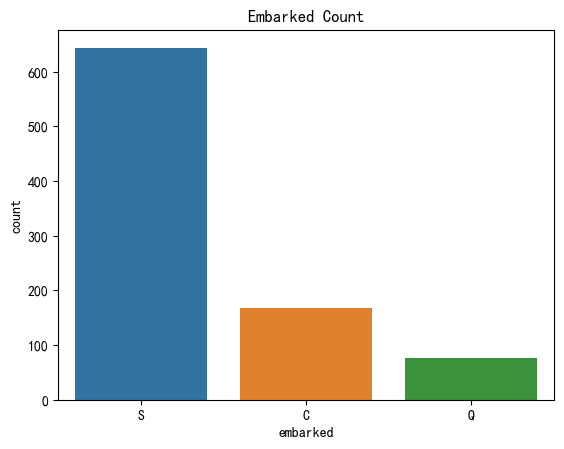

In [57]:
# Visualize before preprocessing
sns.histplot(x=df['age'], kde=True).set_title("Age Distribution")
plt.show()

sns.boxplot(x=df['fare']).set_title("Fare Boxplot")
plt.show()

sns.countplot(x='sex', data=df).set_title("Sex Count")
plt.show()

sns.countplot(x='embarked', data=df).set_title("Embarked Count")
plt.show()

### Preprocessing

In [35]:
# Features
numeric_features = ["age", "sibsp", "parch", "fare"]
categorical_features = ["sex", "embarked"]
ordinal_features = ["pclass"]  # treated as numeric here

In [36]:
# Numeric pipeline: impute + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [37]:
# Categorical pipeline: impute + one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [38]:
# Combine
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

### Create pipeline with model

In [ ]:
# Create pipeline with model
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


### Train/test split and fit

In [42]:
# Train/test split and fit
X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))

In [43]:
# evaluate
print("Test Accuracy:", clf.score(X_test, y_test))


Test Accuracy: 0.7937219730941704


In [47]:
logistic_preds = clf.predict(X_test)


In [49]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))


Logistic Regression Accuracy: 0.7937219730941704


### Cross-Validation

In [51]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logistic_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy:", logistic_scores)
print("Mean CV Accuracy (Logistic):", logistic_scores.mean())


Logistic Regression CV Accuracy: [0.79329609 0.80337079 0.76966292 0.76404494 0.81460674]
Mean CV Accuracy (Logistic): 0.7889962965287804


### Confusion Matrix

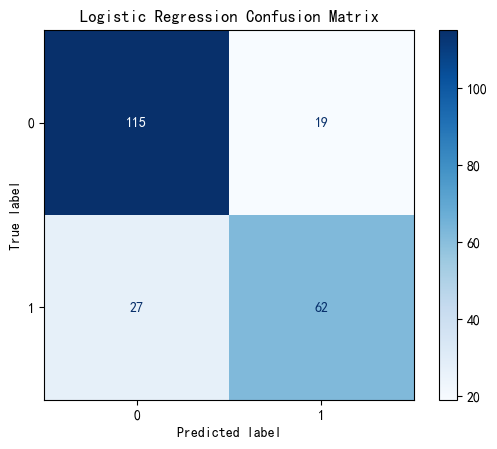

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, logistic_preds)
disp_log = ConfusionMatrixDisplay(cm_log, display_labels=clf.named_steps['classifier'].classes_)
disp_log.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Show Precision, Recall, and F1-Score

In [53]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds, target_names=["Did not survive", "Survived"]))


Logistic Regression Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.81      0.86      0.83       134
       Survived       0.77      0.70      0.73        89

       accuracy                           0.79       223
      macro avg       0.79      0.78      0.78       223
   weighted avg       0.79      0.79      0.79       223



### Plot ROC Curves and Compute AUC

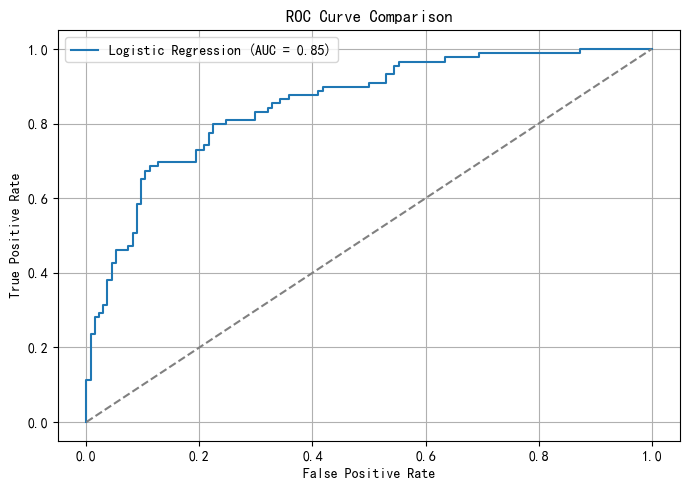

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
logistic_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_probs)

# Compute AUC
auc_log = roc_auc_score(y_test, logistic_probs)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Precision–Recall (PR) curves

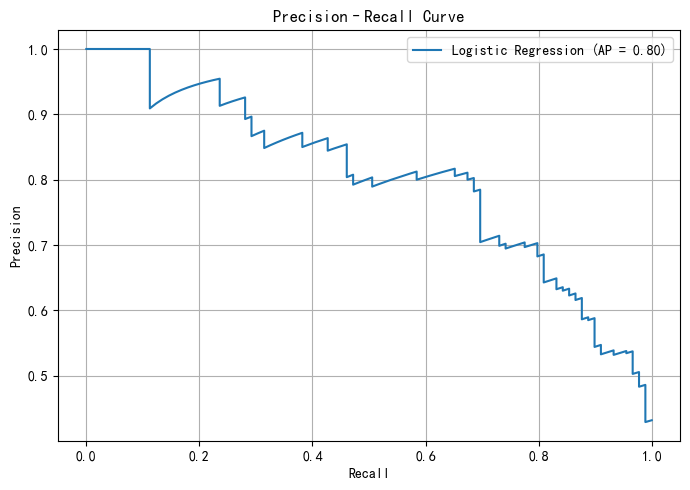

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall points
precision_log, recall_log, _ = precision_recall_curve(y_test, logistic_probs)

# Average precision scores (summary value under the curve)
ap_log = average_precision_score(y_test, logistic_probs)

# Plot PR curves
plt.figure(figsize=(7, 5))
plt.plot(recall_log, precision_log, label=f"Logistic Regression (AP = {ap_log:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Precision and Recall vs. Thresholds

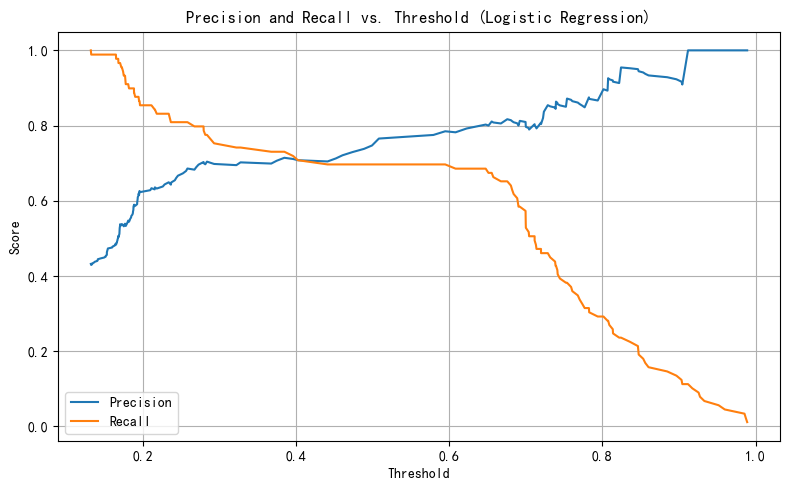

In [56]:
# Get thresholds + precision & recall for logistic regression
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, logistic_probs)

# Exclude last point (sklearn adds 1 extra for plotting)
thresholds = thresholds
precision_vals = precision_vals[:-1]
recall_vals = recall_vals[:-1]

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_vals, label="Precision")
plt.plot(thresholds, recall_vals, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
